In [2]:
import pandas as pd
import numpy as np

# Loading the data

## Loading trips.csv

Dataset at the center of the diagram linking the routes, the stop times, the shapes and the calendar.

In [3]:
trips_data = pd.read_csv('../../data/gtfs23Sept/trips.csv', sep=",")
trips_data.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,14,237259001,113275577237259001,JULES BORDET,0,8934823,069b0002
1,14,237259001,113275578237259001,JULES BORDET,0,8934827,069b0002
2,14,237259001,113275579237259001,JULES BORDET,0,8934823,069b0002
3,14,237259001,113275580237259001,BORDET STATION,0,8934822,069b0005
4,14,237259001,113275581237259001,JULES BORDET,0,8934826,069b0002


## Loading routes.csv

Dataset containing transportation classes (tram, bus, metro) in order to select only trams.

In [4]:
routes_data = pd.read_csv('../../data/gtfs23Sept/routes.csv', sep=",")

print(routes_data['route_type'].unique())
# print(np.unique(routes_data['route_type']))

routes_data.head()

[1 0 3]


,route_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,1,GARE DE L'OUEST - STOCKEL,NaN,1,NaN,B5378C,FFFFFF
1,4,2,SIMONIS - ELISABETH,NaN,1,NaN,ED6C23,FFFFFF
2,5,3,ESPLANADE - CHURCHILL,NaN,0,NaN,B4BD10,000000
3,8,4,GARE DU NORD - STALLE (P),NaN,0,NaN,EA4F80,000000
4,2,5,ERASME - HERRMANN-DEBROUX,NaN,1,NaN,F6A90B,FFFFFF


We can observe that there are only 3 types (which matches our 3 tram, bus and metros types). Using the column `route_long_name`, we were able to verify that:

| `route_type` |  **Type** |
|--------------|:---------:|
| 0            |  **Tram** |
| 1            | **Metro** |
| 3            |  **Bus**  |

## Loading stop_times.csv

Dataset containing the exact times at which a vehicle arrives at/departs from a stop, for every vehicle for every line.

Given that we are trying to plot, for **every stop** of **both directions** of **every line**, the **arrival time** of a given transportation vehicle. We take the arrival time (different from the departure time) because it's the time that matters to passengers.

In [5]:
stop_times_data = pd.read_csv('../../data/gtfs23Sept/stop_times.csv', sep=",")
stop_times_data.head()

# print(stop_times_data['route_type'].unique())

<ipython-input-5-7696884e884f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times_data = pd.read_csv('../../data/gtfs23Sept/stop_times.csv', sep=",")


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,113275577237259001,08:52:00,08:52:00,3107,1,0,0
1,113275577237259001,08:53:00,08:53:00,3177,2,0,0
2,113275577237259001,08:54:03,08:54:03,3171,3,0,0
3,113275577237259001,08:55:30,08:55:30,3172,4,0,0
4,113275577237259001,08:56:18,08:56:18,3173,5,0,0


We will attempt to join the tables in order to filter out metros and buses, given that trams are the vehicle type that we are studying.

In [6]:
trips_routes_merge = pd.merge(trips_data, routes_data, on='route_id')
trips_routes_merge = trips_routes_merge[['trip_id', 'service_id', 'route_type', 'route_short_name', 'trip_headsign', 'direction_id']]
trips_routes_merge = trips_routes_merge.loc[trips_routes_merge['route_type'] == 0]
trips_routes_merge.head()
# trips_routes_merge.tail()

,trip_id,service_id,route_type,route_short_name,trip_headsign,direction_id
48056,113566853238562002,238562002,0,3,CHURCHILL,0
48057,113566856238562002,238562002,0,3,CHURCHILL,0
48058,113566857238562002,238562002,0,3,ESPLANADE,1
48059,113566858238562002,238562002,0,3,ESPLANADE,1
48060,113566859238562002,238562002,0,3,ESPLANADE,1


We have successfully linked (tram) routes to all other possible datasets.

### TODO: verify hypothesis that monday = weekday (that 1 1 1 1 1 = 1)

In [7]:
calendar_data = pd.read_csv('../../data/gtfs23Sept/calendar.csv', sep=",")
trips_routes_calendar = pd.merge(trips_routes_merge, calendar_data, on='service_id')
trips_routes_calendar.drop(['end_date', 'tuesday', 'wednesday', 'thursday', 'friday', 'service_id'], inplace=True, axis=1)
trips_routes_calendar.rename(columns={'monday': 'weekday'}, inplace=True)  #TODO hypothesis: monday = weekday
trips_routes_calendar.tail()

,trip_id,route_type,route_short_name,trip_headsign,direction_id,weekday,saturday,sunday,start_date
22158,113127688236806601,0,93,STADE,1,0,0,1,20210926
22159,113127695236806601,0,93,STADE,1,0,0,1,20210926
22160,113127702236806601,0,93,STADE,1,0,0,1,20210926
22161,113127707236806601,0,93,STADE,1,0,0,1,20210926
22162,113127711236806601,0,93,STADE,1,0,0,1,20210926


Now that we have linked calendar and routes, we will now further link it to stop times.

In [8]:
print(len(trips_routes_calendar))
trcst = pd.merge(stop_times_data, trips_routes_calendar, on='trip_id',how="inner")
print(len(trcst))
trcst.drop(['pickup_type', 'drop_off_type', 'stop_sequence', 'departure_time', 'trip_id'], inplace=True, axis=1)
trcst.head(30)




22163
478220


,arrival_time,stop_id,route_type,route_short_name,trip_headsign,direction_id,weekday,saturday,sunday,start_date
0,21:54:00,5701,0,3,CHURCHILL,0,1,0,0,20210920
1,21:56:00,5700G,0,3,CHURCHILL,0,1,0,0,20210920
2,21:57:29,5704F,0,3,CHURCHILL,0,1,0,0,20210920
3,21:58:31,5705,0,3,CHURCHILL,0,1,0,0,20210920
4,22:00:00,5706,0,3,CHURCHILL,0,1,0,0,20210920
5,22:03:00,5707,0,3,CHURCHILL,0,1,0,0,20210920
6,22:05:00,2338F,0,3,CHURCHILL,0,1,0,0,20210920
7,22:06:20,2318G,0,3,CHURCHILL,0,1,0,0,20210920
8,22:08:00,2543F,0,3,CHURCHILL,0,1,0,0,20210920
9,22:08:54,6178,0,3,CHURCHILL,0,1,0,0,20210920


Say we take Tram 3 direction CHURCHILL at stop 5701.

In [71]:
stop_id = '5705'
line = '3'
date = 20210920
trcst2 = trcst.loc[(trcst['direction_id'] == 0) & (trcst['weekday'] == 1) & (trcst['stop_id'] == stop_id) & (trcst['route_short_name'] == line) & (trcst['start_date'] == date)]


trip_headsign = trcst['trip_headsign'].iat[0]
trcst2 = trcst2['arrival_time']
print(len(trcst2))
print(len(np.unique(trcst2)))
# trcst2.head()
arrival_times = trcst2.tolist()
print(sorted(arrival_times))

153
153
['05:04:31', '05:20:31', '05:32:31', '05:44:31', '05:56:31', '06:08:31', '06:18:31', '06:27:31', '06:37:31', '06:46:31', '06:54:31', '07:00:31', '07:06:31', '07:13:31', '07:19:31', '07:24:31', '07:29:31', '07:34:31', '07:39:31', '07:44:31', '07:49:31', '07:54:31', '07:59:31', '08:04:31', '08:09:31', '08:14:31', '08:19:31', '08:24:31', '08:29:31', '08:34:31', '08:39:31', '08:44:31', '08:49:31', '08:54:31', '08:59:31', '09:04:31', '09:10:31', '09:18:31', '09:25:31', '09:33:31', '09:40:31', '09:48:31', '09:55:31', '10:03:31', '10:10:31', '10:18:31', '10:25:31', '10:33:31', '10:40:31', '10:49:31', '10:56:31', '11:04:31', '11:11:31', '11:19:31', '11:26:31', '11:34:31', '11:41:31', '11:49:31', '11:56:31', '12:04:31', '12:11:31', '12:19:31', '12:26:31', '12:34:31', '12:41:31', '12:49:31', '12:56:31', '13:04:31', '13:11:31', '13:19:31', '13:26:31', '13:34:31', '13:41:31', '13:49:31', '13:56:31', '14:04:31', '14:11:31', '14:19:31', '14:26:31', '14:34:31', '14:41:31', '14:48:31', '14:55:

In [10]:
def time_to_sec(time:str) -> int:
    time = time.split(":")
    hours, minutes, seconds = int(time[0]), int(time[1]), int(time[2])
    return hours*60*60+minutes*60+seconds

In [11]:
arrival_times_minutes = map(time_to_sec, arrival_times)
arrival_times_minutes = list(arrival_times_minutes)
arrival_times_minutes = sorted(arrival_times_minutes)
print(arrival_times_minutes)

[18271, 19231, 19951, 20671, 21391, 22111, 22711, 23251, 23851, 24391, 24871, 25231, 25591, 26011, 26371, 26671, 26971, 27271, 27571, 27871, 28171, 28471, 28771, 29071, 29371, 29671, 29971, 30271, 30571, 30871, 31171, 31471, 31771, 32071, 32371, 32671, 33031, 33511, 33931, 34411, 34831, 35311, 35731, 36211, 36631, 37111, 37531, 38011, 38431, 38971, 39391, 39871, 40291, 40771, 41191, 41671, 42091, 42571, 42991, 43471, 43891, 44371, 44791, 45271, 45691, 46171, 46591, 47071, 47491, 47971, 48391, 48871, 49291, 49771, 50191, 50671, 51091, 51571, 51991, 52471, 52891, 53311, 53731, 54211, 54631, 55111, 55531, 56011, 56311, 56611, 56911, 57211, 57511, 57811, 58111, 58411, 58711, 59011, 59311, 59611, 59911, 60211, 60511, 60811, 61111, 61411, 61711, 62011, 62311, 62611, 62911, 63211, 63511, 63811, 64111, 64411, 64711, 65011, 65311, 65611, 65911, 66271, 66631, 66991, 67471, 67951, 68431, 68911, 69451, 69931, 70411, 70891, 71371, 71911, 72571, 73291, 74011, 74731, 75511, 76231, 76951, 77671, 78391

In [12]:
x, y = [], []
print(arrival_times_minutes[0+1]-arrival_times_minutes[0])
print(arrival_times_minutes[1+1]-arrival_times_minutes[1])
for i in range(len(arrival_times_minutes)-1):
    #if round((arrival_times_minutes[i+1]-arrival_times_minutes[i])/60, 2):
    y.append(round((arrival_times_minutes[i+1]-arrival_times_minutes[i])/60, 2))
    x.append(round(arrival_times_minutes[i]/3600, 2))

960
720


In [13]:
import matplotlib.pyplot as plt

In [14]:
coutn = 0
for i in range(len(y)):
    if y[i]== 0:
        coutn += 1
print(coutn)
print(len(y))

0
152


**TODO** : Change the plot to a bar plot

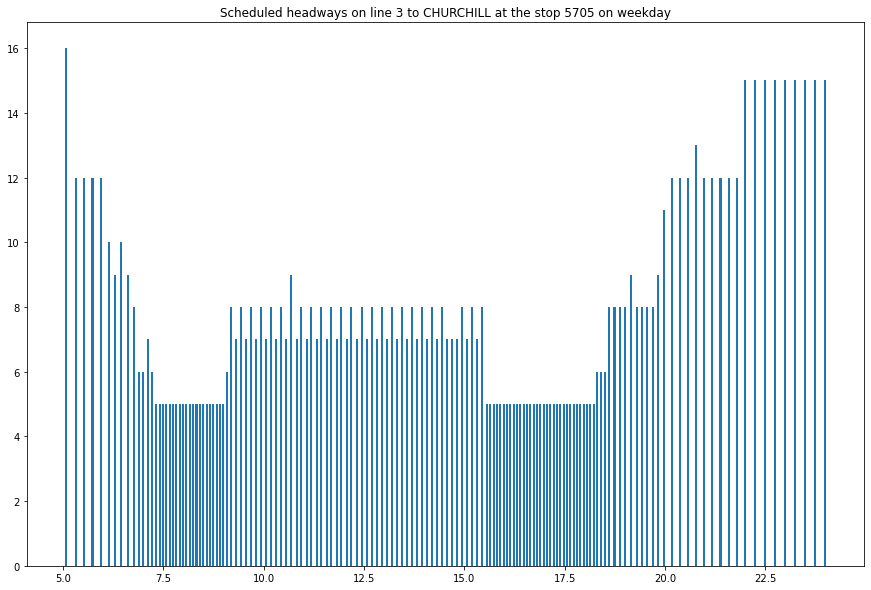

In [15]:
title = f"Scheduled headways on line {line} to {trip_headsign} at the stop {stop_id} on weekday"
plt.figure(figsize=[15,10])
plt.bar(x, y, width=0.05)
plt.title(title)
plt.show()

[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


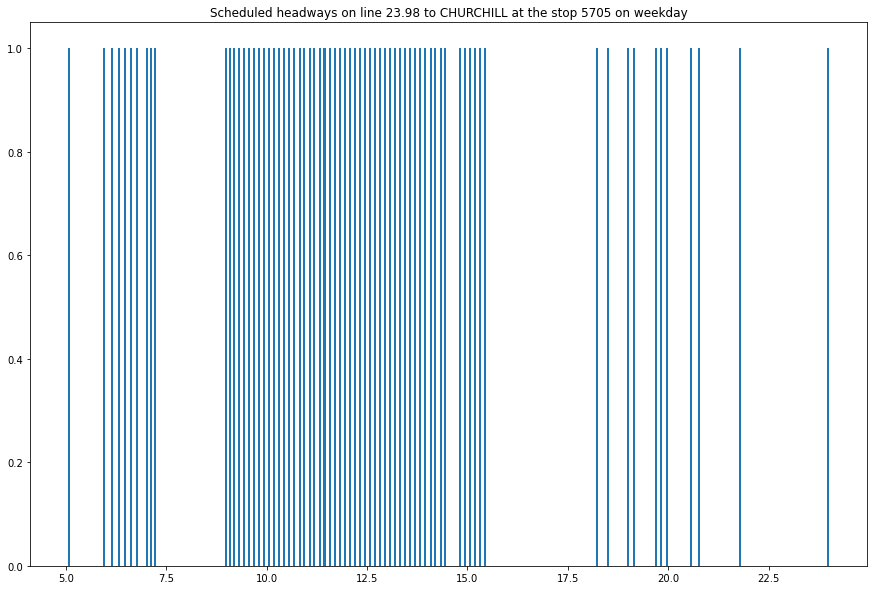

In [61]:
from math import floor, ceil
from statistics import mean

def gradient(y):
    output = []
    for i in range(len(y)-1):
        value = y[i+1]-y[i]
        if value:
            output.append(1)
        else:
            output.append(0)

    # output.extend(ceil(abs(y[i+1]-y[i])/100) for i in range(len(y)-1))
    output.append(1)
    return output

def mean_filter(y, k=3):
    output = [y[:floor(k/2)]] 
    output.extend(mean(y[i-floor(k/2):i+floor(k/2)]) for i in range(floor(k/2), len(y)-floor(k/2)))
    output.append(y[len(y)-floor(k/2):])
    return output


print(gradient(y))
title = f"Scheduled headways on line {line} to {trip_headsign} at the stop {stop_id} on weekday"
plt.figure(figsize=[15,10])
plt.bar(x, gradient(y), width=0.05)
plt.title(title)
plt.show()





0 diff
1 diff
2 diff
3 diff
4 diff
5 diff
6 diff
7 diff
8 diff
9 diff
10 diff
11 diff
12 diff
13 diff
14 diff
15 diff
16 diff
17 diff
15 zero
16 zero
17 zero
18 zero
19 zero
20 zero
21 zero
22 zero
23 zero
24 zero
25 zero
26 zero
27 zero
28 zero
29 zero
30 zero
31 zero
32 zero
33 zero
34 zero
35 diff
36 diff
37 diff
38 diff
39 diff
40 diff
41 diff
42 diff
43 diff
44 diff
45 diff
46 diff
47 diff
48 diff
49 diff
50 diff
51 diff
52 diff
53 diff
54 diff
55 diff
56 diff
57 diff
58 diff
59 diff
60 diff
61 diff
62 diff
63 diff
64 diff
65 diff
66 diff
67 diff
68 diff
69 diff
70 diff
71 diff
72 diff
73 diff
74 diff
75 diff
76 diff
77 diff
78 diff
79 diff
80 diff
81 diff
82 diff
83 diff
84 diff
85 diff
86 diff
87 diff
88 diff
89 diff
90 diff
88 zero
89 zero
90 zero
91 zero
92 zero
93 zero
94 zero
95 zero
96 zero
97 zero
98 zero
99 zero
100 zero
101 zero
102 zero
103 zero
104 zero
105 zero
106 zero
107 zero
108 zero
109 zero
110 zero
111 zero
112 zero
113 zero
114 zero
115 zero
116 zero
117 zero


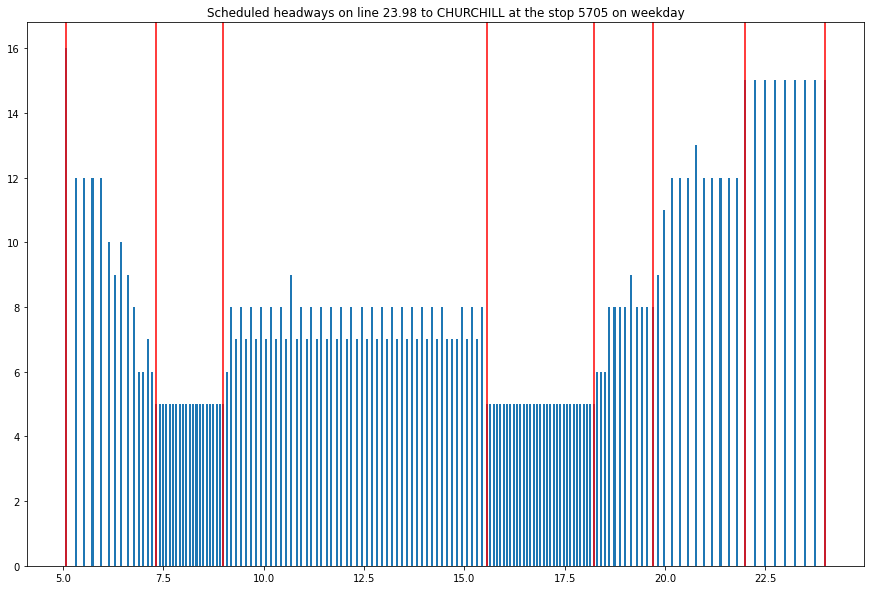

[5.08, 7.33, 8.99, 15.56, 18.23, 19.69, 21.98, 23.98]
0 1 16.0 5.08
1 0 12.0 5.34
2 0 12.0 5.54
3 0 12.0 5.74
4 1 12.0 5.94
5 1 10.0 6.14
6 1 9.0 6.31
7 1 10.0 6.46
8 1 9.0 6.63
9 1 8.0 6.78
10 0 6.0 6.91
11 1 6.0 7.01
12 1 7.0 7.11
13 1 6.0 7.23
14 0 5.0 7.33
15 0 5.0 7.41
16 0 5.0 7.49
17 0 5.0 7.58
18 0 5.0 7.66
19 0 5.0 7.74
20 0 5.0 7.83
21 0 5.0 7.91
22 0 5.0 7.99
23 0 5.0 8.08
24 0 5.0 8.16
25 0 5.0 8.24
26 0 5.0 8.33
27 0 5.0 8.41
28 0 5.0 8.49
29 0 5.0 8.58
30 0 5.0 8.66
31 0 5.0 8.74
32 0 5.0 8.83
33 0 5.0 8.91
34 1 5.0 8.99
35 1 6.0 9.08
36 1 8.0 9.18
37 1 7.0 9.31
38 1 8.0 9.43
39 1 7.0 9.56
40 1 8.0 9.68
41 1 7.0 9.81
42 1 8.0 9.93
43 1 7.0 10.06
44 1 8.0 10.18
45 1 7.0 10.31
46 1 8.0 10.43
47 1 7.0 10.56
48 1 9.0 10.68
49 1 7.0 10.83
50 1 8.0 10.94
51 1 7.0 11.08
52 1 8.0 11.19
53 1 7.0 11.33
54 1 8.0 11.44
55 1 7.0 11.58
56 1 8.0 11.69
57 1 7.0 11.83
58 1 8.0 11.94
59 1 7.0 12.08
60 1 8.0 12.19
61 1 7.0 12.33
62 1 8.0 12.44
63 1 7.0 12.58
64 1 8.0 12.69
65 1 7.0 12.83
66

In [68]:
def get_interval(x, y):
    count_zeros = 0
    count_diff = 0
    index = 0
    lines = [x[0]]
    y = gradient(y)
    i = 0
    while i < len(y)-5:

        mode = "zero" if sum(y[i:i+7]) < 3 else "diff"
        temp = 0
        start = index

        if mode == "diff":
            while (count_zeros < 4 or start + 5 > index) and i < len(y): # creating the diff zone
                print(i, mode)
                if y[i]:
                    if temp >= 2:
                        count_zeros = 0
                        temp = 0
                    elif count_zeros:
                        temp+=1
                elif index != i:
                    if not count_zeros:
                        index = i
                    count_zeros += 1
                i+=1

            lines.append(x[index])
            count_zeros = 0
            if i < len(y):
                i = index + 1

        elif mode == "zero":
            while (count_diff < 1 or start + 5 > index) and i < len(y):
                print(i, mode)
                if y[i]: 
                    if not count_diff:
                        index = i
                    count_diff += 1
                elif temp > 2:
                    count_diff = 0
                    temp = 0
                elif count_diff:
                    temp +=1
                i+=1

            lines.append(x[index])
            count_diff = 0
            if i < len(y):
                i = index + 1

    return lines

lines = get_interval(x, y)

title = f"Scheduled headways on line {line} to {trip_headsign} at the stop {stop_id} on weekday"
plt.figure(figsize=[15,10])
plt.bar(x, y, width=0.05)
# plt.plot(x, y)
for line in lines:
    plt.axvline(x = line, color = 'r', label = 'axvline - full height')
plt.title(title)
plt.show()
temp = gradient(y)
print(lines)
for i in range(len(y)):
    print(i, temp[i], y[i], x[i])


        

In [72]:
z = list(zip(x,y))
z=np.array([list(x) for x in list(zip(x,y))])



In [73]:
from sklearn import cluster


#clustering = cluster.DBSCAN(eps=0.5, min_samples=20).fit(z)
#clustering = cluster.KMeans(n_clusters = 5, random_state=0).fit(z)
#clustering = cluster.Birch(n_clusters = None).fit(z)
#clustering = cluster.OPTICS(min_samples =20 ).fit(z)
#clustering = cluster.AffinityPropagation(random_state =0 ).fit(z)
clustering = cluster.MeanShift(bandwidth =3 ).fit(z)
#clustering = cluster.AgglomerativeClustering(5).fit(z)
labels = clustering.labels_
print(np.unique(labels))

[0 1 2 3 4 5]


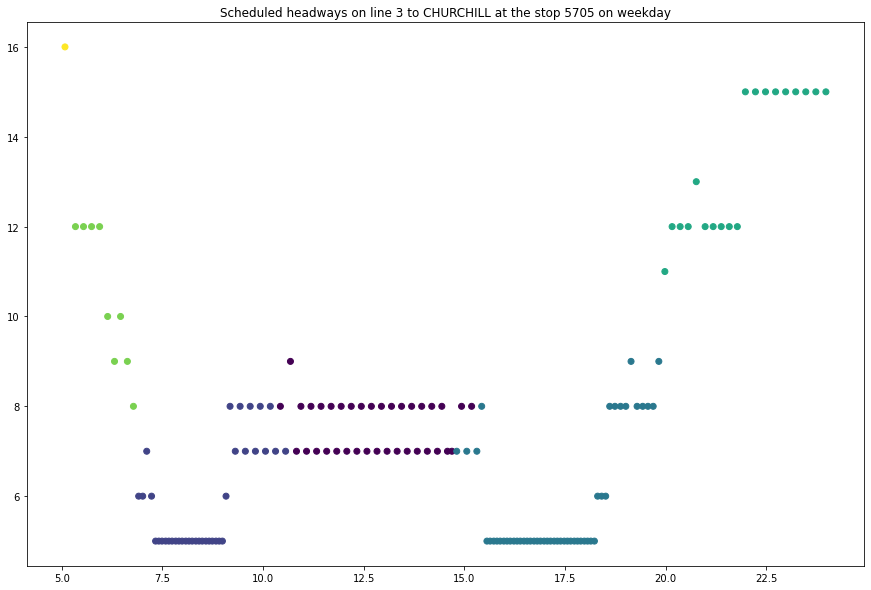

In [74]:
title = f"Scheduled headways on line {line} to {trip_headsign} at the stop {stop_id} on weekday"
plt.figure(figsize=[15,10])
plt.scatter(x, y, c=labels)
plt.title(title)
plt.show()